In [105]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [96]:
df_train = pd.read_csv('/Users/angelali/Desktop/Kaggle projects/disaster tweet prediction/train.csv')
df_test = pd.read_csv('/Users/angelali/Desktop/Kaggle projects/test.csv', encoding ='latin1')

print('the numbers of datapoints in training set: {}'.format(len(df_train)))
print('the numbers of features in training set: {}'.format(len(df_train.columns)))
print('the numbers of datapoints in test set: {}'.format(len(df_test)))
print('the numbers of features test set: {}'.format(len(df_test.columns)))

the numbers of datapoints in training set: 7613
the numbers of features in training set: 5
the numbers of datapoints in test set: 3263
the numbers of features test set: 4


In [97]:
df_train.head(1)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [98]:
df_train.drop('id', axis=1, inplace = True)
df_train.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [99]:
df_test.head()

,keyword,location,text,target
0,NaN,NaN,Just happened a terrible car crash,1
1,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


# look at the target variable in training data set

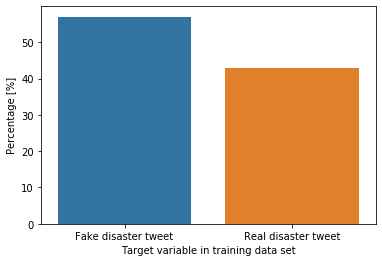

In [100]:
target_counts = df_train['target'].value_counts().div(len(df_train)).mul(100) # calculating percentages of target values

ax = sns.barplot(target_counts.index, target_counts.values)
ax.set_xlabel('Target variable in training data set')
ax.set_ylabel('Percentage [%]')
ax.set_xticklabels(['Fake disaster tweet','Real disaster tweet'])
plt.show()

So this dataset is Not unbalanced

# Check the percentage of missing values in'Location' and 'Keyword' columns

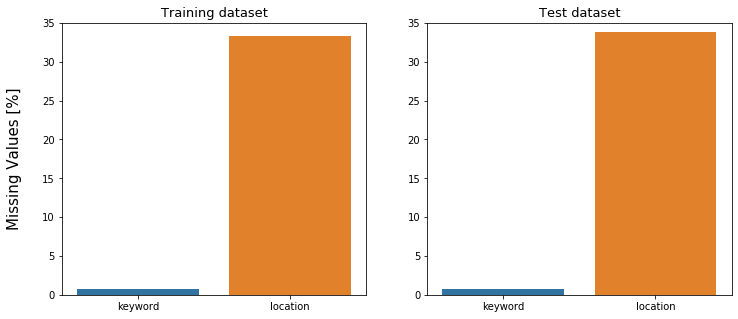

In [101]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

train_nans = df_train[missing_cols].isnull().sum()/len(df_train)*100
test_nans = df_test[missing_cols].isnull().sum()/len(df_test)*100

sns.barplot(x=train_nans.index, y=train_nans.values, ax=axes[0])
sns.barplot(x=test_nans.index, y=test_nans.values, ax=axes[1])

axes[0].set_ylabel('Missing Values [%]', size=15, labelpad=20)
axes[0].set_yticks(np.arange(0,40,5))
axes[0].set_ylim((0,35))
axes[1].set_yticks(np.arange(0,40,5))
axes[1].set_ylim((0,35))

axes[0].set_title('Training dataset', fontsize=13)
axes[1].set_title('Test dataset', fontsize=13)
plt.show()

# Looking into 'keyword' columns

In [103]:
# count the distinct keywords
dist_keyword=df_train['keyword'].value_counts()
print(dist_keyword.head(30))

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
windstorm      40
collided       40
fear           40
twister        40
siren          40
evacuate       40
outbreak       40
hellfire       39
sunk           39
whirlwind      39
derailment     39
famine         39
explosion      39
weapons        39
wreckage       39
sinkhole       39
earthquake     39
wrecked        39
flames         39
collision      39
weapon         39
hurricane      38
drowned        38
Name: keyword, dtype: int64


# Check the top 30 important keywods from the REAL disaster tweets and their true ratio

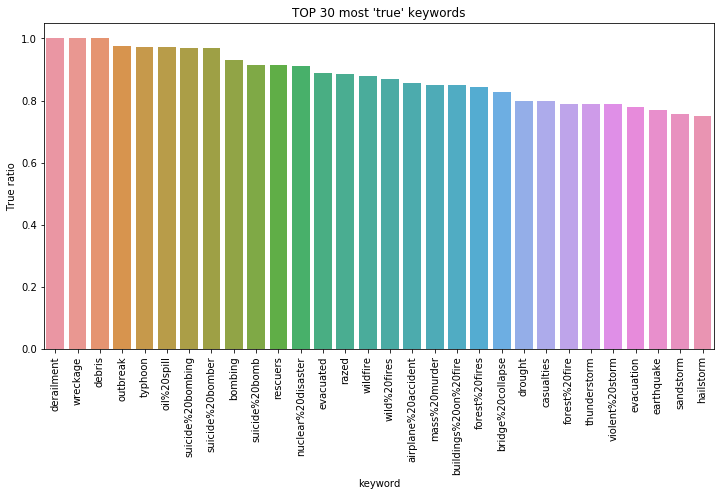

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
true_ratios = df_train.groupby('keyword')['target'].mean().sort_values(ascending=False)
sns.barplot(x=true_ratios.index[:30], y=true_ratios.values[:30], ax=ax)
plt.xticks(rotation=90)
plt.title("TOP 30 most 'true' keywords")
plt.ylabel("True ratio")
plt.show()

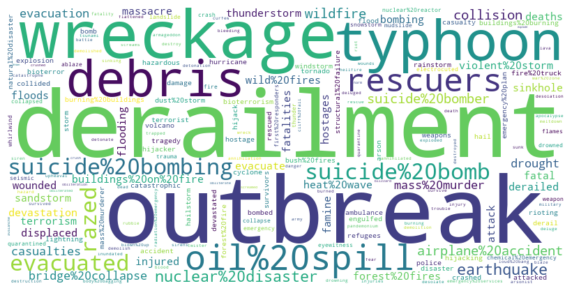

In [10]:
disaster_tweet = dict(df_train[df_train['target']==1]['keyword'].value_counts())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(disaster_tweet)

plt.figure(figsize=[10,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Check the top 30 important keywods from the FAKE disaster tweets and their true ratio

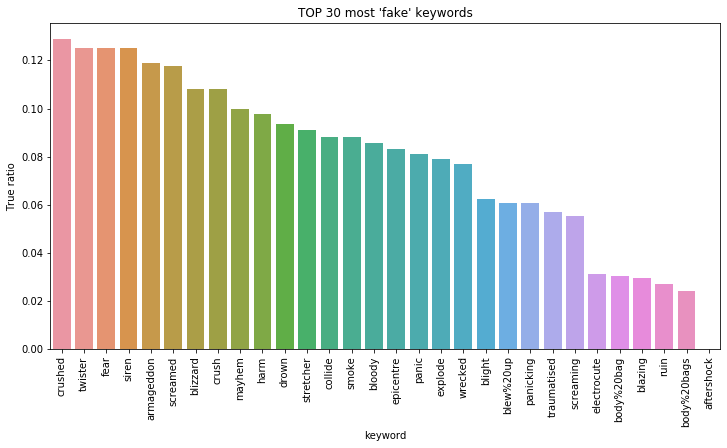

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
true_ratios = df_train.groupby('keyword')['target'].mean().sort_values(ascending=False)
sns.barplot(x=true_ratios.index[-30:], y=true_ratios.values[-30:], ax=ax)
plt.xticks(rotation=90)
plt.title("TOP 30 most 'fake' keywords")
plt.ylabel("True ratio")
plt.show()

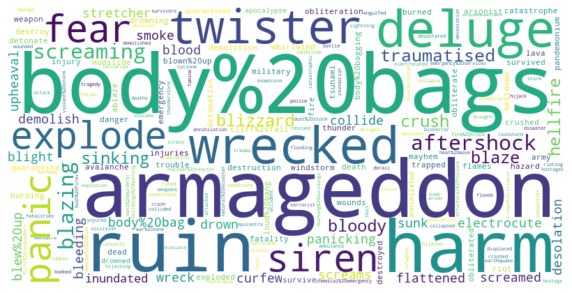

In [12]:
nondisaster_tweet = dict(df_train[df_train['target']==0]['keyword'].value_counts())

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(nondisaster_tweet)

plt.figure(figsize=[10,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text data preprocessing 

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/angelali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/angelali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angelali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# created functions to remove url, html, emoji from text data
import re

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# created puntucation removal function
import string
def remove_punc(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)


# created a stopword filter function
stop_words=set(stopwords.words("english"))
def stopword_filter(sentence):
    filtered_sentence=[]
    for word in sentence:
        if word not in stop_words:
            filtered_sentence.append(word)
    return filtered_sentence  

In [15]:
# Dealing with slange
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

def unslang(text):
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text

In [16]:
print('thx -> ', unslang('thx'))
print('WTG -> ', unslang('WTG'))
print('BTW -> ', unslang('BTW'))

thx ->  Thank You
WTG ->  Way To Go!
BTW ->  By The Way


# Created a Lemmatizer

In [17]:
# Created a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

print(lemmatizer.lemmatize("I am doing it")) #I am doing it
print(lemmatizer.lemmatize("doing")) #doing
print(lemmatizer.lemmatize("doing", "v")) #doing
print(lemmatize_sentence("I am doing it")) #I be do it

I am doing it
doing
do
['I', 'be', 'do', 'it']


# Built a data_preprocess functions that embedded all the text-process functions above 

In [18]:
def data_preprocess(text_column):
    text_column = text_column.apply(remove_url).apply(remove_html).apply(remove_emoji)\
                             .apply(remove_punc).apply(unslang).apply(lemmatize_sentence)\
                             .apply(stopword_filter)
                             
    return text_column
                  

# Preprocess the training data 

In [19]:
df_train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [20]:
df_train['text'] = data_preprocess(df_train['text'])

In [21]:
df_train['text'].head()

0    [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, resident, ask, shelter, place, notify, o...
3    [13000, people, receive, wildfire, evacuation,...
4    [Just, get, send, photo, Ruby, Alaska, smoke, ...
Name: text, dtype: object

In [22]:
df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x))

In [23]:
df_train['text'][0:20]

0      Our Deeds Reason earthquake May ALLAH Forgive us
1                 Forest fire near La Ronge Sask Canada
2     All resident ask shelter place notify officer ...
3     13000 people receive wildfire evacuation order...
4     Just get send photo Ruby Alaska smoke wildfire...
5     RockyFire Update California Hwy 20 close direc...
6     flood disaster Heavy rain cause flash flooding...
7                           Im top hill I see fire wood
8     Theres emergency evacuation happen building ac...
9                           Im afraid tornado come area
10                       Three people die heat wave far
11    Haha South Tampa get flood hah WAIT A SECOND I...
12    rain flood Florida TampaBay Tampa 18 19 day Iv...
13                    Flood Bago Myanmar We arrive Bago
14        Damage school bus 80 multi car crash BREAKING
15                                            Whats man
16                                         I love fruit
17                                        Summer

# Preprocess the test data

In [24]:
df_test['text'] = data_preprocess(df_test['text'])

In [25]:
df_test['text'].head()

0                 [Just, happen, terrible, car, crash]
1    [Heard, earthquake, different, city, stay, saf...
2    [forest, fire, spot, pond, goose, flee, across...
3               [Apocalypse, light, Spokane, wildfire]
4         [Typhoon, Soudelor, kill, 28, China, Taiwan]
Name: text, dtype: object

In [26]:
df_test['text'] = df_test['text'].apply(lambda x: ' '.join(x))
df_test['text'][0:20]

0                        Just happen terrible car crash
1     Heard earthquake different city stay safe ever...
2     forest fire spot pond goose flee across street...
3                     Apocalypse light Spokane wildfire
4                 Typhoon Soudelor kill 28 China Taiwan
5                            Were shakingIts earthquake
6     Theyd probably still show life Arsenal yesterd...
7                                               Hey How
8                                         What nice hat
9                                                  Fuck
10                                  No I dont like cold
11                                      NOOOOOOOOO Dont
12                                         No dont tell
13                                                 What
14                                              Awesome
15    Birmingham Wholesale Market ablaze BBC News Fi...
16                sunkxssedharry wear short race ablaze
17    PreviouslyOnDoyinTv Toke MakinwaåäÌÝå » ma

# Used and tuned TF-IDF to vectroize test data 

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
X_train = df_train['text']
y_train = df_train['target'].values

X_test = df_test['text']
y_test = df_test['target'].values

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.model_selection import GridSearchCV

# Tuned TF-IDF and built SVM model

In [48]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm_model', SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))
])

parameters = {
    'tfidf__ngram_range': [(1, 2), (2, 3)],
    'tfidf__max_df': [0.2, 0.5]
}

In [49]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, scoring='f1')
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('svm_model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [50]:
print("Best Score: ", grid_search_tune.best_score_)
print("Best Params: ", grid_search_tune.best_params_)

Best Score:  0.6258762988294814
Best Params:  {'tfidf__max_df': 0.2, 'tfidf__ngram_range': (1, 2)}


In [52]:
vect1 = TfidfVectorizer(ngram_range=(1,2), max_df=0.2)
vect1_tfidf = vect1.fit(df_train['text'])
X_train_svm = vect1_tfidf.transform(df_train['text'])
X_test_svm = vect1_tfidf.transform(df_test['text'])

# Built and evaluated SVM model

In [62]:
svm_linear = SVC(C=50, kernel='linear')

In [63]:
svm_linear_model = svm_linear.fit(X_train_svm, y_train)

In [64]:
y_pred_svm = svm_model.predict(X_test_svm)
con_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = average_precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

print(con_matrix_svm)
print('F1 score: {0:0.2f}'.format(f1_score_svm))
print('precision score: {0:0.2f}'.format(precision_svm))
print('recall score: {0:0.2f}'.format(recall_svm))

[[1569  292]
 [ 380 1022]]
F1 score: 0.75
precision score: 0.68
recall score: 0.73


# Tuned TF-IDF and built Random forest model

In [77]:
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_forest_model', RandomForestClassifier())
])

parameters_rf = {
    'tfidf__ngram_range': [(1, 2), (2, 3)],
    'tfidf__max_df': [0.2, 0.5],
    'random_forest_model__n_estimators':[100,150,200]
}

In [78]:
grid_search_rf = GridSearchCV(pipeline_rf, parameters_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_rf.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('random_forest_model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]


In [79]:
print("Best Score: ", grid_search_rf.best_score_)
print("Best Params: ", grid_search_rf.best_params_)

Best Score:  0.5372383169574193
Best Params:  {'random_forest_model__n_estimators': 200, 'tfidf__max_df': 0.2, 'tfidf__ngram_range': (1, 2)}


In [81]:
vect2 = TfidfVectorizer(ngram_range=(1,2), max_df=0.2)
vect2_tfidf = vect2.fit(df_train['text'])
X_train_rf = vect2_tfidf.transform(df_train['text'])
X_test_rf = vect2_tfidf.transform(df_test['text'])

In [82]:
random_forest = RandomForestClassifier(n_estimators=200)

In [83]:
random_forest_model = random_forest.fit(X_train_rf, y_train)

In [84]:
y_pred_rf = random_forest_model.predict(X_test_rf)
con_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = average_precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print(con_matrix_rf)
print('F1 score: {0:0.2f}'.format(f1_score_rf))
print('precision score: {0:0.2f}'.format(precision_rf))
print('recall score: {0:0.2f}'.format(recall_rf))

[[1698  163]
 [ 513  889]]
F1 score: 0.72
precision score: 0.69
recall score: 0.63


# Built XGBoost Model and create evaluation matrices 

In [31]:
vect_ = TfidfVectorizer(max_df=0.2)
vect3 = vect_.fit(df_train['text'])
X_train3 = vect3.transform(df_train['text'])
X_test3 = vect3.transform(df_test['text'])

X_train_xgb, X_valid_xgb, y_train_xgb, y_valid_xgb = train_test_split(X_train3, y_train, test_size=0.2, random_state=0)

In [32]:
xgb_model = XGBClassifier(       learning_rate=0.1,
                              num_round=1000,
                              max_depth=10,
                              min_child_weight=2,
                              colsample_bytree=0.8,
                              subsample=0.9,
                              gamma=0.4,
                              reg_alpha=1e-5,
                              reg_lambda=1,
                              n_estimators=2000,
                              objective='binary:logistic',
                              eval_metric=["auc", "logloss", "error"],
                              early_stopping_rounds=50)

In [ ]:
xgb_model.fit(X_train_xgb, y_train_xgb, eval_set=[(X_train_xgb, y_train_xgb),(X_valid_xgb, y_valid_xgb)])

In [86]:
y_pred_xgb = xgb_model.predict(X_test3)
con_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
precision_xgb = average_precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)

print(con_matrix_xgb)
print('F1 score: {0:0.2f}'.format(f1_score_xgb))
print('precision score: {0:0.2f}'.format(precision_xgb))
print('recall score: {0:0.2f}'.format(recall_xgb))

[[1548  313]
 [ 475  927]]
F1 score: 0.70
precision score: 0.64
recall score: 0.66


# Comparing the performance of different models 

# F1_Ratio 

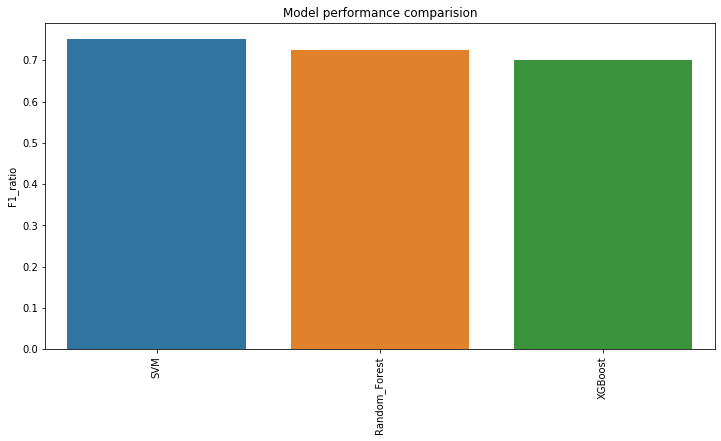

In [88]:
models = ['SVM', 'Random_Forest', 'XGBoost']
F1_ratio = [f1_score_svm, f1_score_rf, f1_score_xgb]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=models, y=F1_ratio, ax=ax)
plt.xticks(rotation=90)
plt.title("Model performance comparision")
plt.ylabel("F1_ratio")
plt.show()

# Precision score

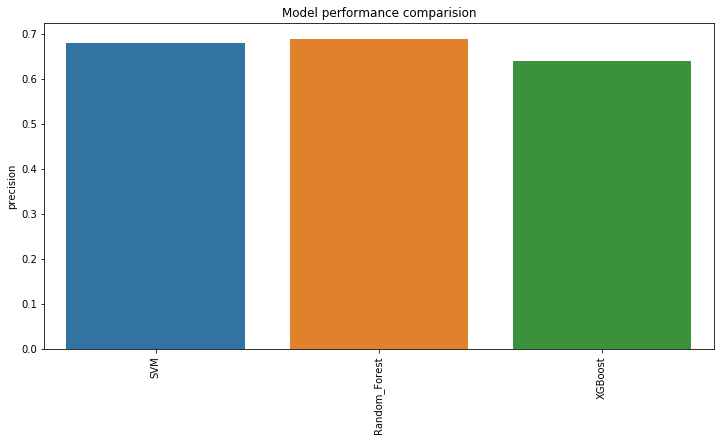

In [106]:
models = ['SVM', 'Random_Forest', 'XGBoost']
precision = [precision_svm, precision_rf, precision_xgb]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=models, y=precision, ax=ax)
plt.xticks(rotation=90)
plt.title("Model performance comparision")
plt.ylabel("precision")
plt.show()

# Recall score

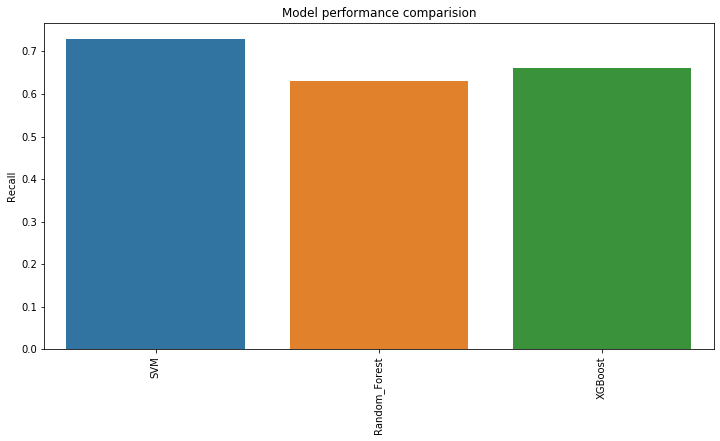

In [107]:
models = ['SVM', 'Random_Forest', 'XGBoost']
recall = [recall_svm, recall_rf, recall_xgb]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=models, y=recall, ax=ax)
plt.xticks(rotation=90)
plt.title("Model performance comparision")
plt.ylabel("Recall")
plt.show()

# Used joblib to save the SVM model for reusability 

In [91]:
from sklearn.externals import joblib

SVM_model_path = '/Users/angelali/Desktop/Kaggle projects/disaster tweet prediction/SVM_model.pkl'
joblib.dump(svm_linear_model, SVM_model_path)

['/Users/angelali/Desktop/Kaggle projects/disaster tweet prediction/SVM_model.pkl']

In [94]:
model = joblib.load(SVM_model_path) 

print('predicted value', model.predict(X_test_svm[0:10]))
print('ground truth', y_test[0:10])

predicted value [1 1 1 1 1 1 0 0 0 0]
ground truth [1 1 1 1 1 1 0 0 0 0]
